In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

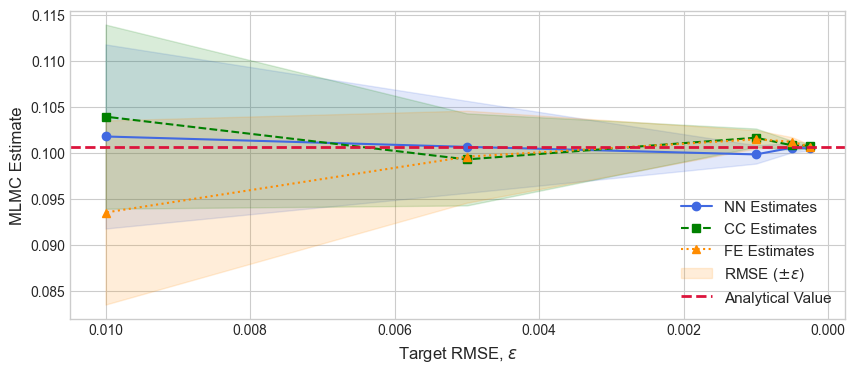

In [108]:
true_value = lambda n: (1 - np.exp(- 2 * n**2 * np.pi**2 * 0.25)) / (n**2 * np.pi**2)
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_nn['eps'], df_nn['mlmc_estimate'], 'o-', label='NN Estimates', color='royalblue')
ax.fill_between(df_nn['eps'], 
                df_nn['mlmc_estimate'] - df_nn['eps'], 
                df_nn['mlmc_estimate'] + df_nn['eps'], 
                color='royalblue', alpha=0.15)

ax.plot(df_cc['eps'], df_cc['mlmc_estimate'], 's--', label='CC Estimates', color='green')
ax.fill_between(df_cc['eps'], 
                df_cc['mlmc_estimate'] - df_cc['eps'], 
                df_cc['mlmc_estimate'] + df_cc['eps'], 
                color='green', alpha=0.15)

ax.plot(df_fe['eps'], df_fe['mlmc_estimate'], '^:', label='FE Estimates', color='darkorange')
ax.fill_between(df_fe['eps'], 
                df_fe['mlmc_estimate'] - df_fe['eps'], 
                df_fe['mlmc_estimate'] + df_fe['eps'], 
                color='darkorange', alpha=0.15, label=r'RMSE ($\pm \varepsilon$)')

ax.axhline(y=true_value(1), linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

ax.invert_xaxis()
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=12)
ax.set_ylabel('MLMC Estimate', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('report/graphics/she_sq_amp_conv.png', dpi=300,
            bbox_inches='tight')

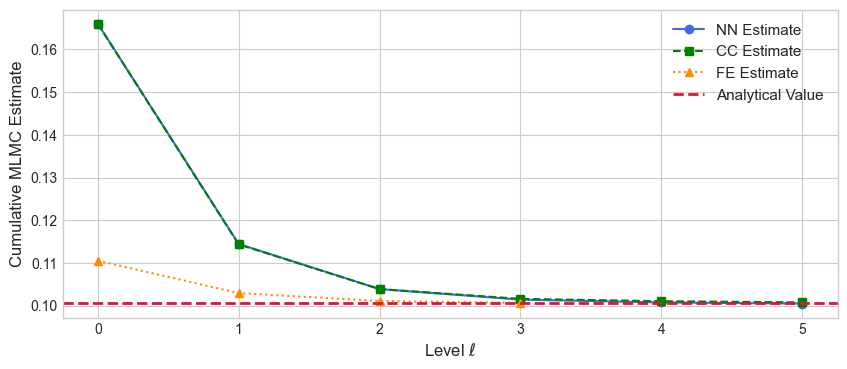

In [109]:
true_value = lambda n: (1 - np.exp(- 2 * n**2 * np.pi**2 * 0.25)) / (n**2 * np.pi**2)
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

# Nearest Neighbours (NN)
Yl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Yl_")]].iloc[0].values
Nl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Nl_")]].iloc[0].values
Vl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Vl_")]].iloc[0].values
est_nn = np.cumsum(Yl_nn)
se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))
levels_nn = np.arange(len(est_nn))
ax.plot(levels_nn, est_nn, 'o-', label='NN Estimate', color='royalblue')

# Central Coupling (CC)
Yl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Yl_")]].iloc[0].values
Nl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Nl_")]].iloc[0].values
Vl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Vl_")]].iloc[0].values
est_cc = np.cumsum(Yl_cc)
levels_cc = np.arange(len(est_cc))
ax.plot(levels_cc, est_cc, 's--', label='CC Estimate', color='green')

# Finite Element (FE)
Yl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Yl_")]].iloc[0].values
Nl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Nl_")]].iloc[0].values
Vl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Vl_")]].iloc[0].values
est_fe = np.cumsum(Yl_fe)
levels_fe = np.arange(len(est_fe))
ax.plot(levels_fe, est_fe, '^:', label='FE Estimate', color='darkorange')

# Plot the true value
ax.axhline(y=true_value(1), linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

# Set labels, title, and legend
ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel('Cumulative MLMC Estimate', fontsize=12)
ax.legend(fontsize=11)

# Improve tick parameters and set integer ticks for levels
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_cumconv.png', dpi=300,
            bbox_inches='tight')

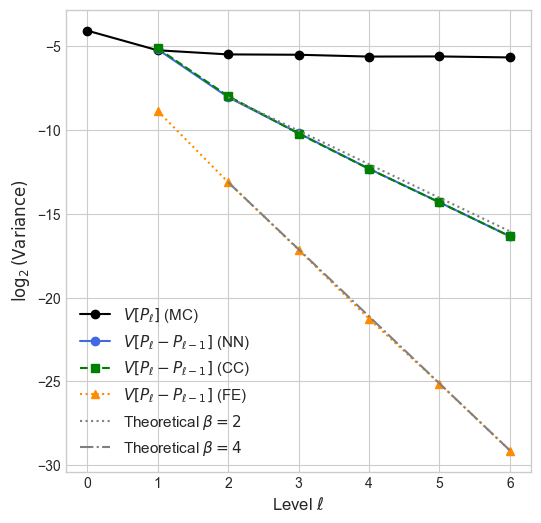

In [94]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

levels = df_cc['level'].values
var_mc = df_cc['var_Pf'].values
var_mlmc_nn = df_nn['var_Pf-Pc'].values
var_mlmc_cc = df_cc['var_Pf-Pc'].values
var_mlmc_fe = df_fe['var_Pf-Pc'].values

ax.plot(levels, np.log2(var_mc), 'ko-', label=r'$V[P_\ell]$ (MC)')
ax.plot(levels[1:], np.log2(var_mlmc_nn[1:]), 'o-', label=r'$V[P_\ell - P_{\ell-1}]$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(var_mlmc_cc[1:]), 's--', label=r'$V[P_\ell - P_{\ell-1}]$ (CC)', color='green')
ax.plot(levels[1:], np.log2(var_mlmc_fe[1:]), '^:', label=r'$V[P_\ell - P_{\ell-1}]$ (FE)', color='darkorange')

# Add theoretical decay lines for reference
l_theory = levels[2:]

# beta=2
beta2_theory = np.log2(var_mlmc_nn[2]) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta2_theory, ':', color='grey', label=r'Theoretical $\beta=2$')

# beta = 4
beta4_theory = np.log2(var_mlmc_fe[2]) - 4.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta4_theory, '-.', color='grey', label=r'Theoretical $\beta=4$')

ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel(r'$\log_2(\text{Variance})$', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_var_decay.png', dpi=300,
            bbox_inches='tight')

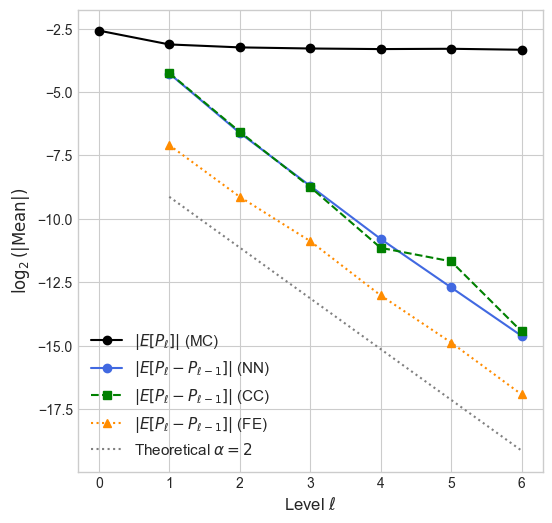

In [ ]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")

levels = df_cc['level'].values
ave_mc = df_cc['ave_Pf'].values
ave_mlmc_nn = df_nn['ave_Pf-Pc'].values
ave_mlmc_cc = df_cc['ave_Pf-Pc'].values
ave_mlmc_fe = df_fe['ave_Pf-Pc'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(levels, np.log2(np.abs(ave_mc)), 'ko-', label=r'$|E[P_\ell]|$ (MC)')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_nn[1:])), 'o-', label=r'$|E[P_\ell - P_{\ell-1}]|$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_cc[1:])), 's--', label=r'$|E[P_\ell - P_{\ell-1}]|$ (CC)', color='green')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_fe[1:])), '^:', label=r'$|E[P_\ell - P_{\ell-1}]|$ (FE)', color='darkorange')

l_theory = levels[1:]
alpha2_theory = np.log2(np.abs(ave_mlmc_fe[2])) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, alpha2_theory, ':', color='grey', label=r'Theoretical $\alpha=2$')

ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel(r'$\log_2(|\text{Mean}|)$', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_err_decay.png', dpi=300,
            bbox_inches='tight')

plt.show()

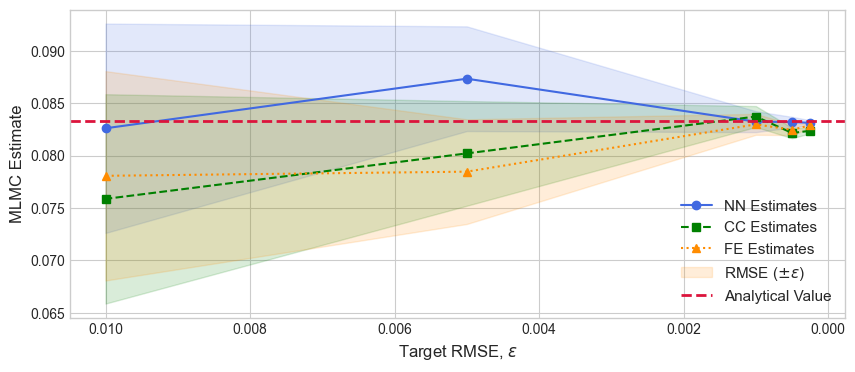

In [110]:
true_value = 1 / 12
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_nn['eps'], df_nn['mlmc_estimate'], 'o-', label='NN Estimates', color='royalblue')
ax.fill_between(df_nn['eps'], 
                df_nn['mlmc_estimate'] - df_nn['eps'], 
                df_nn['mlmc_estimate'] + df_nn['eps'], 
                color='royalblue', alpha=0.15)

ax.plot(df_cc['eps'], df_cc['mlmc_estimate'], 's--', label='CC Estimates', color='green')
ax.fill_between(df_cc['eps'],
                df_cc['mlmc_estimate'] - df_cc['eps'],
                df_cc['mlmc_estimate'] + df_cc['eps'],
                color='green', alpha=0.15)

ax.plot(df_fe['eps'], df_fe['mlmc_estimate'], '^:', label='FE Estimates', color='darkorange')
ax.fill_between(df_fe['eps'], 
                df_fe['mlmc_estimate'] - df_fe['eps'], 
                df_fe['mlmc_estimate'] + df_fe['eps'], 
                color='darkorange', alpha=0.15, label=r'RMSE ($\pm \varepsilon$)')

ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

ax.invert_xaxis()
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=12)
ax.set_ylabel('MLMC Estimate', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('report/graphics/she_energy_conv.png', dpi=300,
            bbox_inches='tight')

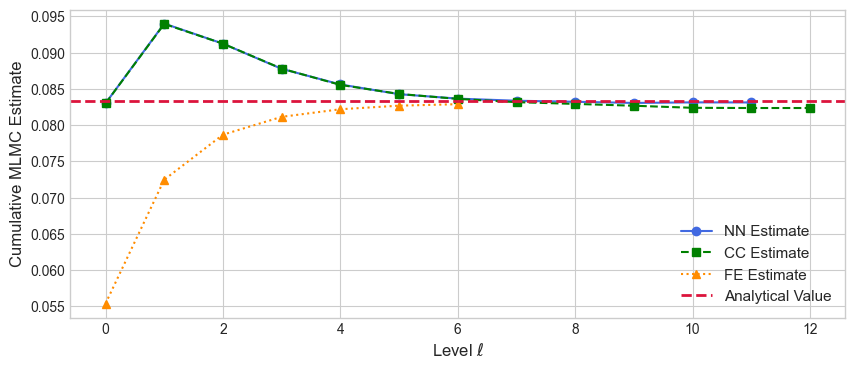

In [111]:
true_value = 1 / 12
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

# Nearest Neighbours (NN)
Yl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Yl_")]].iloc[0].values
Nl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Nl_")]].iloc[0].values
Vl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Vl_")]].iloc[0].values
est_nn = np.cumsum(Yl_nn)
se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))
levels_nn = np.arange(len(est_nn))
ax.plot(levels_nn, est_nn, 'o-', label='NN Estimate', color='royalblue')

# Central Coupling (CC)
Yl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Yl_")]].iloc[0].values
Nl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Nl_")]].iloc[0].values
Vl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Vl_")]].iloc[0].values
est_cc = np.cumsum(Yl_cc)
levels_cc = np.arange(len(est_cc))
ax.plot(levels_cc, est_cc, 's--', label='CC Estimate', color='green')

# Finite Element (FE)
Yl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Yl_")]].iloc[0].values
Nl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Nl_")]].iloc[0].values
Vl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Vl_")]].iloc[0].values
est_fe = np.cumsum(Yl_fe)
levels_fe = np.arange(len(est_fe))
ax.plot(levels_fe, est_fe, '^:', label='FE Estimate', color='darkorange')

# Plot the true value
ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

# Set labels, title, and legend
ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel('Cumulative MLMC Estimate', fontsize=12)
ax.legend(fontsize=11)

# Improve tick parameters and set integer ticks for levels
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_cumconv.png', dpi=300,
            bbox_inches='tight')

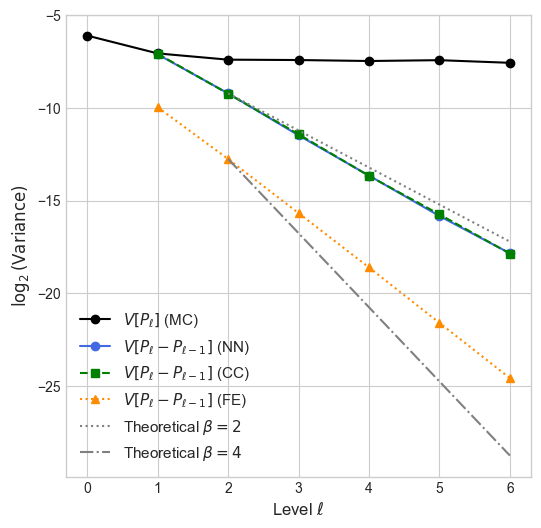

In [112]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

levels = df_cc['level'].values
var_mc = df_cc['var_Pf'].values
var_mlmc_nn = df_nn['var_Pf-Pc'].values
var_mlmc_cc = df_cc['var_Pf-Pc'].values
var_mlmc_fe = df_fe['var_Pf-Pc'].values

ax.plot(levels, np.log2(var_mc), 'ko-', label=r'$V[P_\ell]$ (MC)')
ax.plot(levels[1:], np.log2(var_mlmc_nn[1:]), 'o-', label=r'$V[P_\ell - P_{\ell-1}]$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(var_mlmc_cc[1:]), 's--', label=r'$V[P_\ell - P_{\ell-1}]$ (CC)', color='green')
ax.plot(levels[1:], np.log2(var_mlmc_fe[1:]), '^:', label=r'$V[P_\ell - P_{\ell-1}]$ (FE)', color='darkorange')

# Add theoretical decay lines for reference
l_theory = levels[2:]

# beta=2
beta2_theory = np.log2(var_mlmc_nn[2]) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta2_theory, ':', color='grey', label=r'Theoretical $\beta=2$')

# beta = 4
beta4_theory = np.log2(var_mlmc_fe[2]) - 4.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta4_theory, '-.', color='grey', label=r'Theoretical $\beta=4$')

ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel(r'$\log_2(\text{Variance})$', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_var_decay.png', dpi=300,
            bbox_inches='tight')

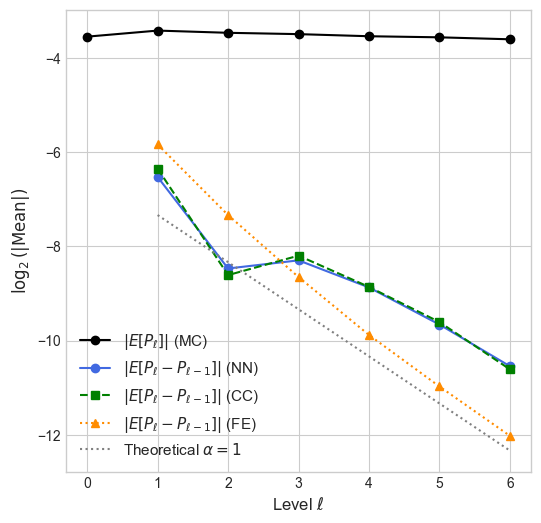

In [118]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

levels = df_cc['level'].values
ave_mc = df_cc['ave_Pf'].values
ave_mlmc_nn = df_nn['ave_Pf-Pc'].values
ave_mlmc_cc = df_cc['ave_Pf-Pc'].values
ave_mlmc_fe = df_fe['ave_Pf-Pc'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(levels, np.log2(np.abs(ave_mc)), 'ko-', label=r'$|E[P_\ell]|$ (MC)')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_nn[1:])), 'o-', label=r'$|E[P_\ell - P_{\ell-1}]|$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_cc[1:])), 's--', label=r'$|E[P_\ell - P_{\ell-1}]|$ (CC)', color='green')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_fe[1:])), '^:', label=r'$|E[P_\ell - P_{\ell-1}]|$ (FE)', color='darkorange')

l_theory = levels[1:]
alpha2_theory = np.log2(np.abs(ave_mlmc_fe[2])) - 1.0 * (l_theory - l_theory[0])
ax.plot(l_theory, alpha2_theory, ':', color='grey', label=r'Theoretical $\alpha=1$')

ax.set_xlabel(r'Level $\ell$', fontsize=12)
ax.set_ylabel(r'$\log_2(|\text{Mean}|)$', fontsize=12)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_err_decay.png', dpi=300,
            bbox_inches='tight')

plt.show()